In [2]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
sys.path.append('../scripts')

In [4]:
from utils import (
    load_dataset, summarize_data, analyze_missing_values, analyze_categorical_data,
    plot_histogram, plot_bar_chart, plot_correlation_matrix, plot_scatter, plot_boxplot
)

### Loading our dataset

In [5]:

df=load_dataset(("../data/MachineLearningRating_v3.csv"))

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\utils.py:12: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [6]:

df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# data inspection
summarize_data(df)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

## Handling missing datas

In [7]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
WrittenOff                  64.183810
Converted                   64.183810
Rebuilt                     64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
VehicleIntroDate             0.055195
NumberOfDoors                0.055195
bodytype                     0.055195
kilowatts                    0.055195
cubiccapacity                0.055195
Cylinders                    0.055195
Model                        0.055195
CapitalOutstanding           0.000200
dtype: float64

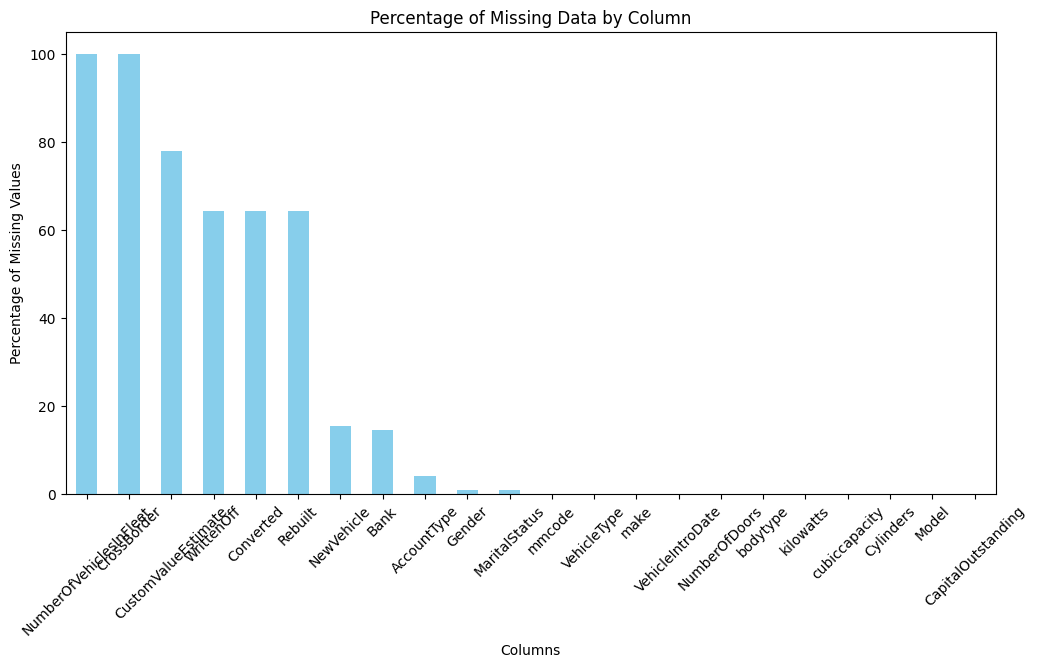

In [74]:
missing_percent.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()

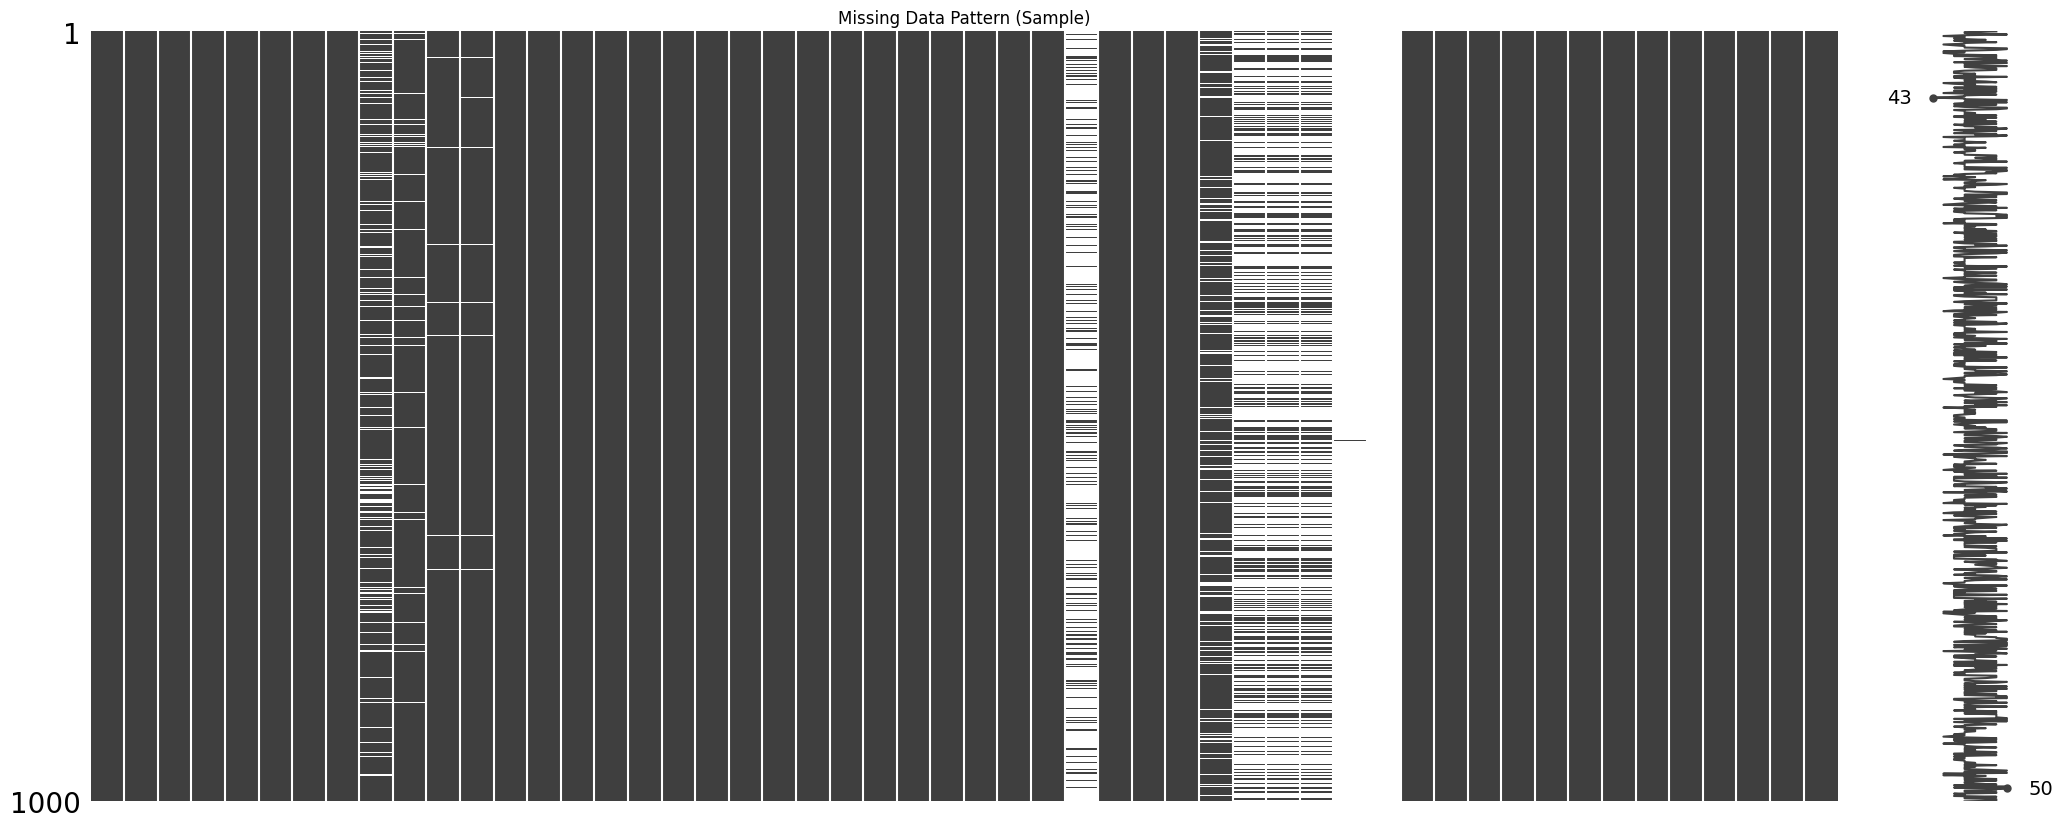

In [75]:
sampled_df = df.sample(n=1000, random_state=42)

# Visualize Missing Data in the Sample
import missingno as msno
msno.matrix(sampled_df)
plt.title('Missing Data Pattern (Sample)')
plt.show()

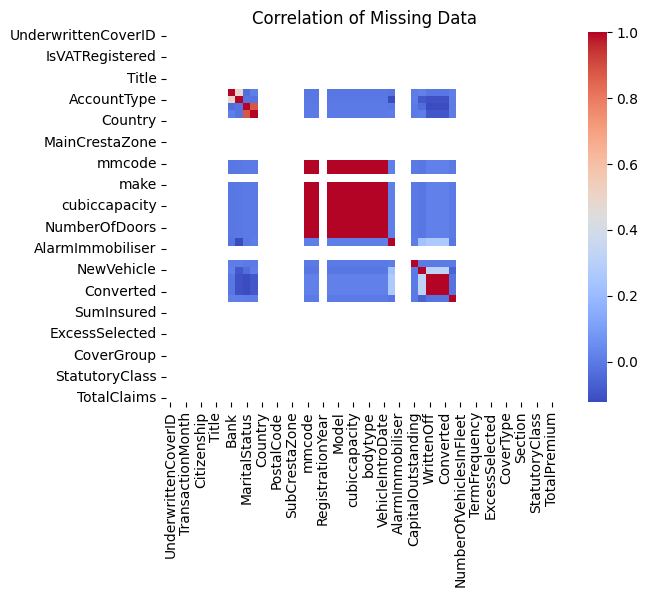

In [77]:
missing_corr = df.isnull().corr()
sns.heatmap(missing_corr, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Missing Data')
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_18360\3529031876.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_group = df.groupby('Province').apply(lambda x: x.isnull().mean() * 100)


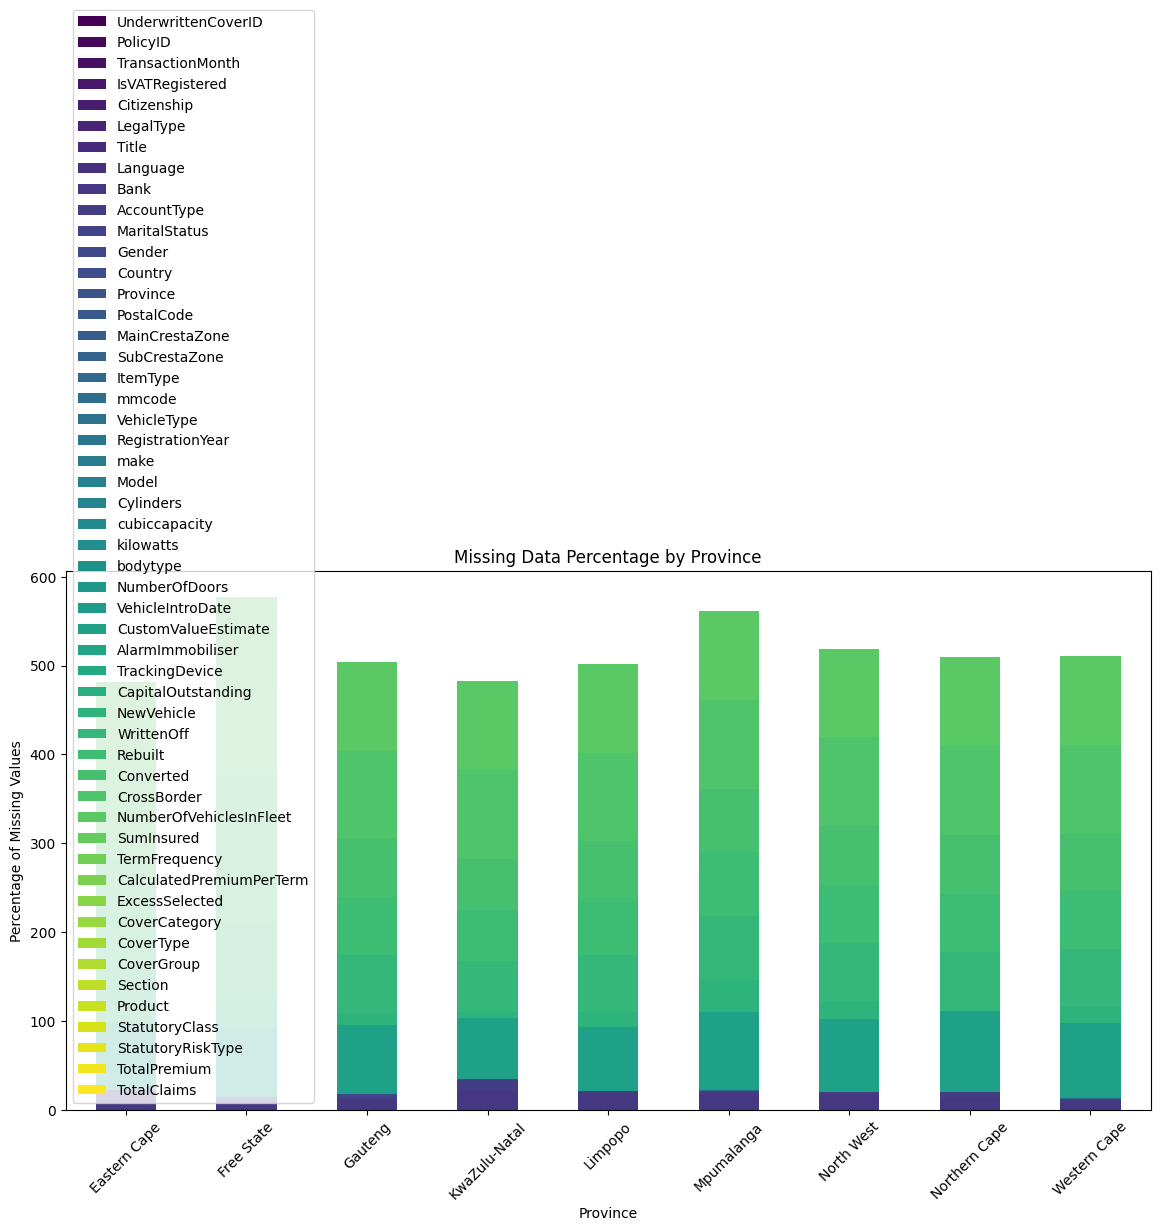

In [78]:
# Missing Values Grouped by Province
missing_by_group = df.groupby('Province').apply(lambda x: x.isnull().mean() * 100)

# Visualize Missing Data by Province
missing_by_group.plot(kind='bar', figsize=(14, 7), stacked=True, colormap='viridis')
plt.title('Missing Data Percentage by Province')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Impute or Drop Columns with High Missing Values
columns_to_impute = ['CustomValueEstimate', 'WrittenOff', 'Converted', 'Rebuilt']
for col in columns_to_impute:
    df[col].fillna(False, inplace=True)  # Assuming missing means "False" or "Not Applicable"

# Drop Columns with Too Many Missing Values
columns_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder']
df.drop(columns=columns_to_drop, inplace=True)


C:\Users\Kalea\AppData\Local\Temp\ipykernel_17940\745328112.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(False, inplace=True)  # Assuming missing means "False" or "Not Applicable"
C:\Users\Kalea\AppData\Local\Temp\ipykernel_17940\745328112.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(False, inplace=True)  

In [9]:
mode_account = df['NewVehicle'].mode()[0]
df['NewVehicle'].fillna(mode_account,inplace=True)
df['Bank'].fillna('Unknown', inplace=True)

C:\Users\Kalea\AppData\Local\Temp\ipykernel_17940\3592352047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NewVehicle'].fillna(mode_account,inplace=True)
C:\Users\Kalea\AppData\Local\Temp\ipykernel_17940\3592352047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

#### Data anlysis and exploring 

In [10]:
# Analyze Categorical Data
categorical_columns = ['Province', 'VehicleType']
analyze_categorical_data(df, categorical_columns)

Value counts for Province:
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64


Value counts for VehicleType:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64




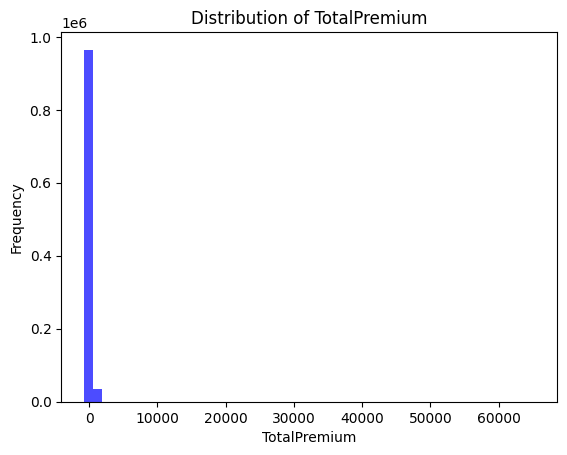

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\utils.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette)


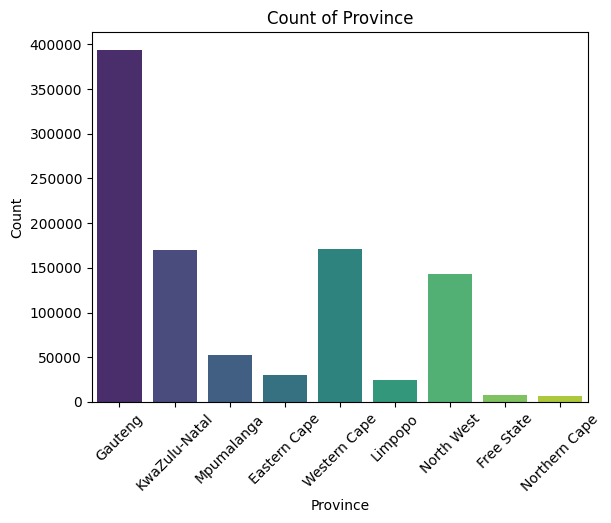

In [11]:
# Univariate Analysis
plot_histogram(df, 'TotalPremium')
plot_bar_chart(df, 'Province')

In [14]:
# Convert 'TransactionMonth' to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

In [15]:
# Select Relevant Columns
correlation_columns = [
    'TransactionMonth', 'MaritalStatus', 'Gender', 'IsVATRegistered',
    'VehicleType', 'RegistrationYear','NumberOfDoors', 'CustomValueEstimate', 'SumInsured', 
    'CalculatedPremiumPerTerm', 'CoverCategory', 'CoverType',
    'TotalPremium', 'TotalClaims'
]
correlation_df = df[correlation_columns]

#### visualizations to understand our data more

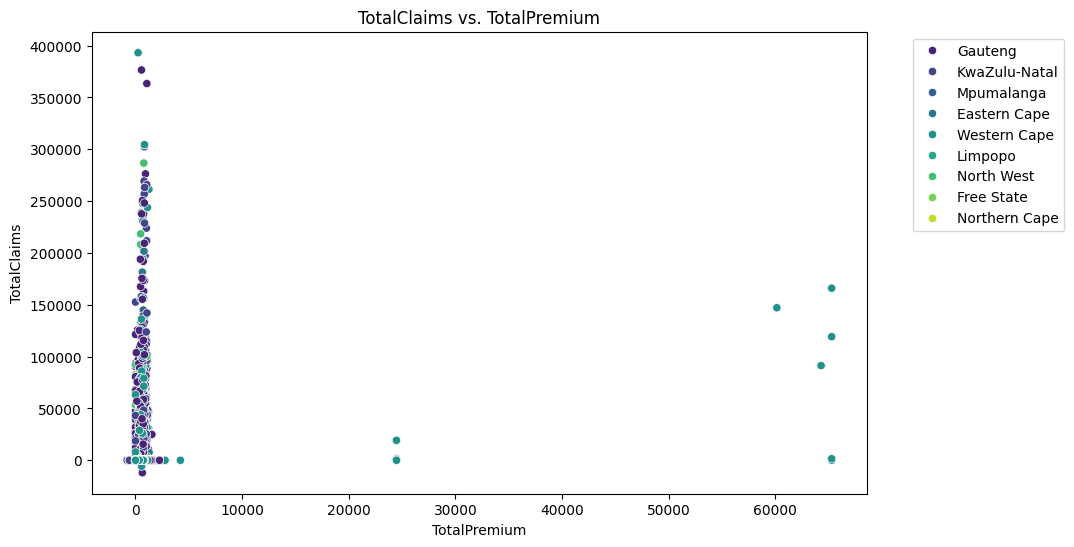

In [19]:
plt.figure(figsize=(10, 6))  
plot_scatter(df, x_col='TotalPremium', y_col='TotalClaims', hue_col='Province')

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\utils.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y=y_col, palette=palette)


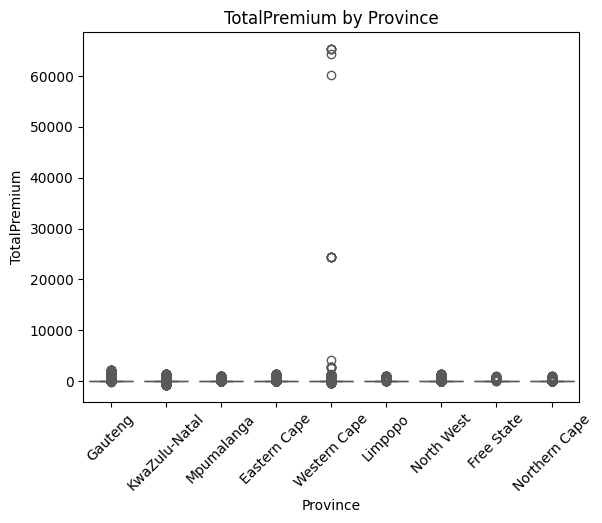

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\utils.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x_col, y=y_col, palette=palette)


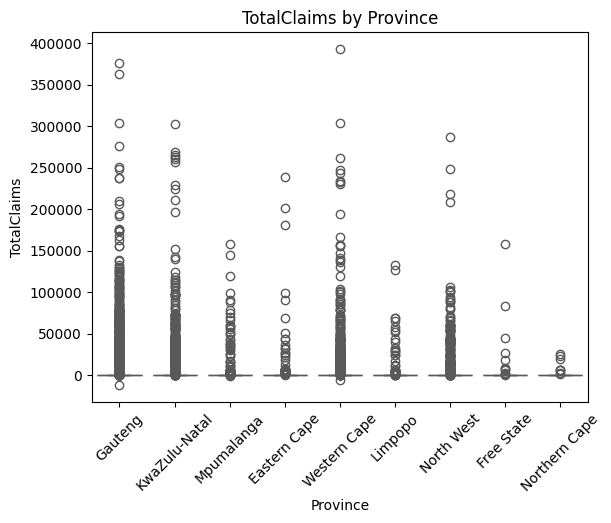

In [21]:

# Box Plot
plot_boxplot(df, x_col='Province', y_col='TotalPremium')
plot_boxplot(df, x_col='Province', y_col='TotalClaims')

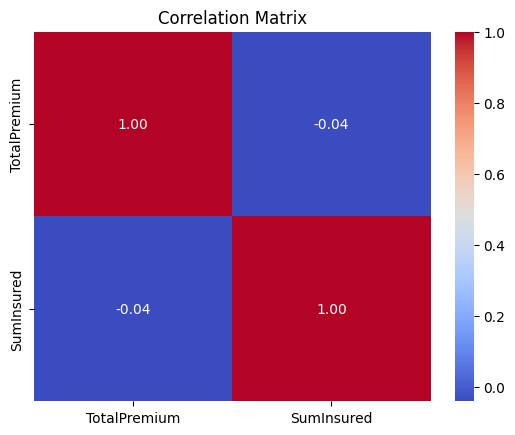

In [38]:
plot_correlation_matrix(df[['TotalPremium','SumInsured','']])

In [69]:
# Policy Details
policy_details = df[['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth']]

# Client Information
client_info = df[['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'MaritalStatus', 'Gender']]

# Location Information
location_info = df[['Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']]

# Vehicle Details
vehicle_details = df[['ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 
                        'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 
                        'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 
                        'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 
                        ]]

# Plan Information
plan_info = df[['SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 
                  'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
                  'StatutoryClass', 'StatutoryRiskType']]

# Payment and Claims
payment_claims = df[['TotalPremium', 'TotalClaims']]

descriptive_stats = df[['TotalPremium', 'TotalClaims','Province']]



In [56]:
summarize_data(descriptive_stats)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   TotalPremium  1000098 non-null  float64
 1   TotalClaims   1000098 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB
None

Summary Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


In [60]:
cols =['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'MaritalStatus', 'Gender','TotalPremium', 'TotalClaims'] 
analyze_categorical_data(df,cols)

Value counts for IsVATRegistered:
IsVATRegistered
False    995075
True       5023
Name: count, dtype: int64


Value counts for Citizenship:
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64


Value counts for LegalType:
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64


Value counts for Title:
Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64


Value counts for Language:
Language
English    1000098
Name: count, dtype: int64


Value counts for MaritalStatus:
MaritalStatus
Not specified    986208
Single             4254
Married            1377
Name: count, dtype: int64


Value counts for Gender:
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64


Value counts for TotalPremium:
TotalPrem

In [58]:
summarize_data(client_info)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   IsVATRegistered  1000098 non-null  bool  
 1   Citizenship      1000098 non-null  object
 2   LegalType        1000098 non-null  object
 3   Title            1000098 non-null  object
 4   Language         1000098 non-null  object
 5   MaritalStatus    991839 non-null   object
 6   Gender           990562 non-null   object
dtypes: bool(1), object(6)
memory usage: 46.7+ MB
None

Summary Statistics:
       IsVATRegistered Citizenship   LegalType    Title Language  \
count          1000098     1000098     1000098  1000098  1000098   
unique               2           4           6        5        1   
top              False              Individual       Mr  English   
freq            995075      895210      911929   933555  1000098   

        MaritalStatus         Gend

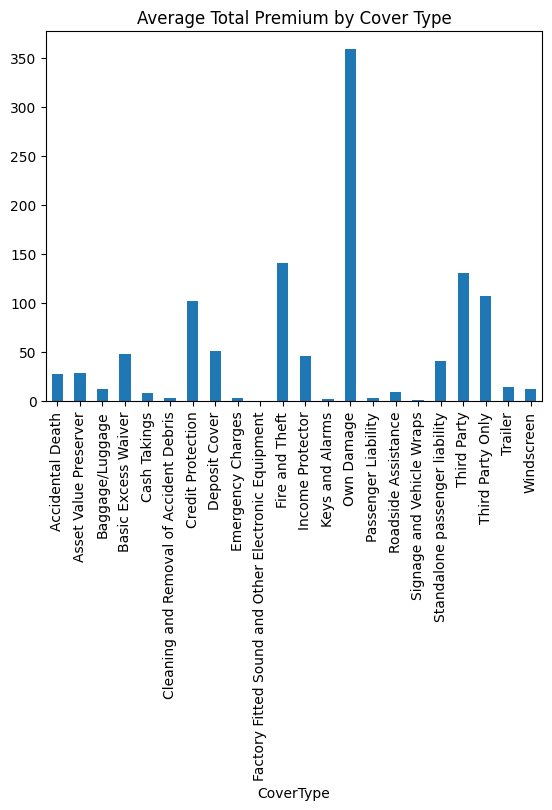

In [25]:
df.groupby('CoverType')['TotalPremium'].mean().plot(kind='bar')
plt.title('Average Total Premium by Cover Type')
plt.show()

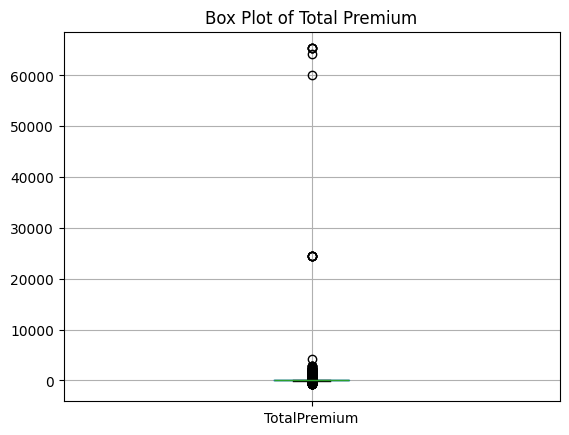

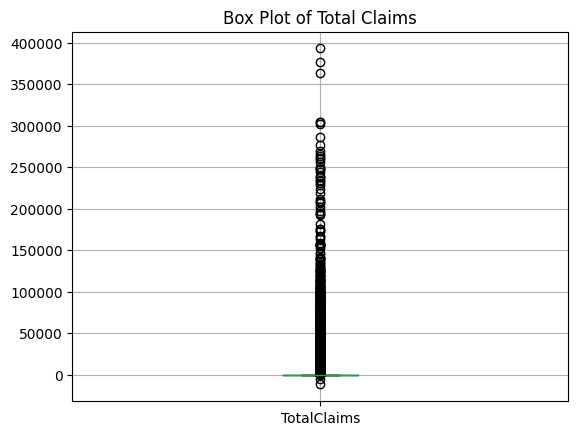

In [39]:
df.boxplot(column='TotalPremium')
plt.title('Box Plot of Total Premium')
plt.show()

df.boxplot(column='TotalClaims')
plt.title('Box Plot of Total Claims')
plt.show()

In [37]:
df['CoverType'].value_counts().head()

CoverType
Own Damage             104183
Passenger Liability    104158
Windscreen             103763
Third Party            102825
Keys and Alarms        102428
Name: count, dtype: int64

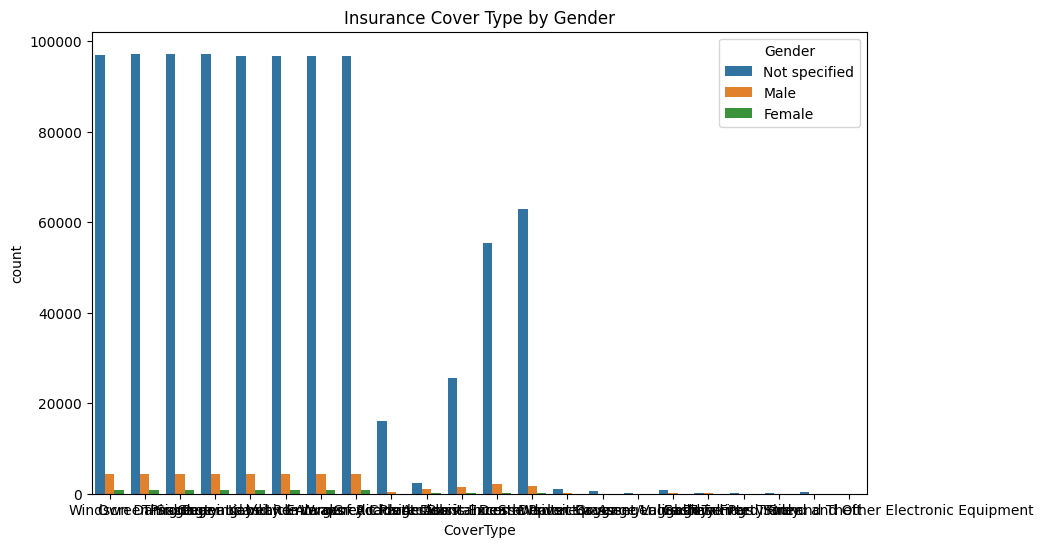

In [21]:

# Example of a creative plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CoverType', hue='Gender')
plt.title('Insurance Cover Type by Gender')
plt.show()

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\utils.py:68: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, palette=palette)


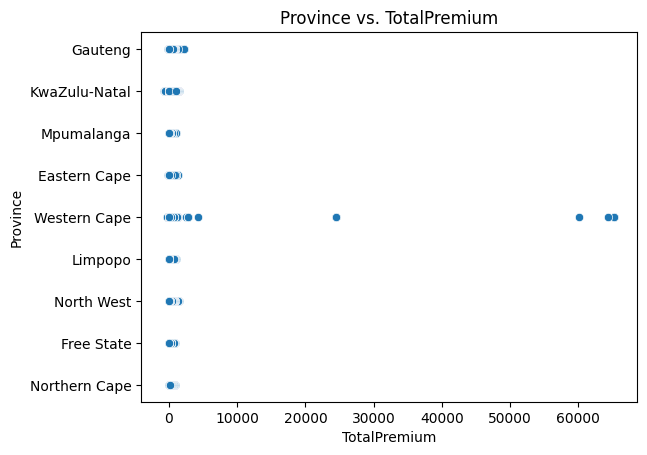

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\utils.py:68: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, palette=palette)


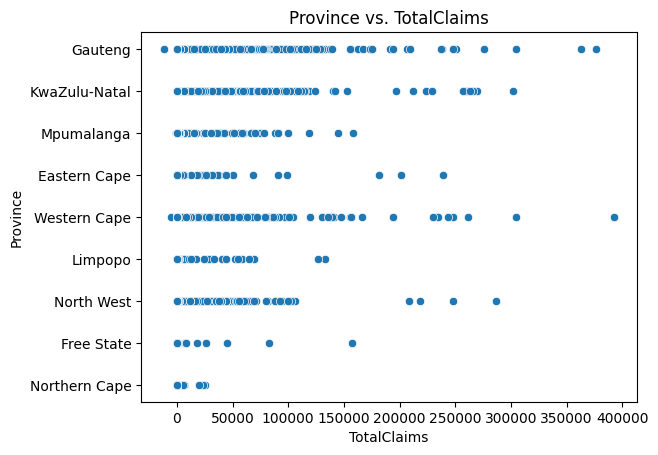

In [75]:
plot_scatter(descriptive_stats,'TotalPremium','Province')
plot_scatter(descriptive_stats,'TotalClaims','Province')